In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
from matplotlib.ticker import NullFormatter
from sklearn import svm
from sklearn.datasets import make_blobs


In [2]:
class genere_distributions():

    x_min, x_max = -7., 6.
    y_min, y_max = -1.5, 6.
    nx, ny = 200, 200
    
    def __init__(self, mu, sigma, prob_C, npts):
        self.mu = mu
        self.sigma = sigma
        self.prob_C = prob_C
        self.npts = npts
        
        # Calcul du nombre de points 2D dans chaque nuage de points. Le nombre total npts est constant, 
        # mais la répartition du nombre de points dans chaque nuage dépend de la probabilité apriori de chaque
        # distribution.
        self.n = (npts*prob_C).astype(int)
        
        self.genere_dataset()
        self.genere_classif()
        

    def genere_dataset(self):
        self.X, self.y = make_blobs(n_samples=self.n, centers=self.mu, cluster_std = self.sigma, n_features=2, \
                  shuffle=False, random_state=42)

    # Calcul des positions (x,y) d'un maillage régulier couvrant le plan XY
    def genere_grid(self):
        self.xx, self.yy = np.meshgrid(np.linspace(self.x_min, self.x_max, self.nx), 
                                       np.linspace(self.y_min, self.y_max, self.ny))
        
    def genere_classif(self):
        self.genere_grid()
        
        # Classifie les nuages de points
        clf = svm.NuSVC(gamma='auto',probability=True)
        clf.fit(self.X, self.y)

        # Calcul de la probabibilité d'appartenance pour chaque classe en chaque point de la grille
        self.prob = clf.predict_proba(np.c_[self.xx.ravel(), self.yy.ravel()])

        # Classe ayant la plus grande probabilité locale
        self.prob = np.max(self.prob,axis=1)
        self.prob = self.prob.reshape(self.xx.shape)        
                
            
    # Affiche la fonction de distribution globale en 3D avec ses contours en 2D. L'orientation de 
    # la figure peut être ajustée avec la souris; cela affiche la valeur de la variable view = [élévation, azimuth]
    def affiche_clusters(self, affiche_tickmarks=True, affiche_contours = False, affiche_prob=False, nom_figure=None):
        
        cm_bright = ListedColormap(['#FF0000', '#00FF00', '#FFFF00'])
        
        fig, ax = plt.subplots()

        ax.scatter(self.X[:, 0], self.X[:, 1], s=30, c=self.y, cmap=cm_bright,
                    edgecolors='k')

        
        # Affiche la zone d'influence de chaque nuage de points
        if (affiche_contours==True):     
            ax.contour(self.xx, self.yy, self.prob, levels=[0.5], linewidths=2,linestyles='dashed')
                
            plt.text(-6.5, 1.3, '$C_{1}$', fontsize=15)
            plt.text(-1.1, 1.8, '$C_{2}$', fontsize=15)
            plt.text(4., 4, '$C_{3}$', fontsize=15)
            plt.text(-1, 0, 'Rejet', fontsize=15)

            
        # Affiche la probablité d'appartenance à la classe dominante dans chaque zone d'influence 
        if (affiche_prob==True):
            im = ax.imshow(self.prob, interpolation='nearest',
                       extent=(self.x_min, self.x_max, self.y_min, self.y_max), aspect='equal',
                       origin='lower', cmap='jet')

            ax.contour(self.xx, self.yy, self.prob, levels=5, linewidths=2, linestyles='dashed')
            cbar = fig.colorbar(im, ax=ax, fraction=0.028, pad=0.04)
            cbar.ax.set_title('Probabilité')

            
        ax.axis([self.x_min, self.x_max, self.y_min, self.y_max])
        plt.ylabel('$X_{2}$', rotation=0, fontsize=15)
        plt.xlabel('$X_{1}$', fontsize=15)
        ax.yaxis.set_label_coords(-0.1,0.5)
        ax.xaxis.set_label_coords(0.5, -0.1)        

        if (affiche_tickmarks==False):
            # Enlève tickmarks
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_major_formatter(NullFormatter())
        
        fig.tight_layout()
                
        # Sauvegarde de l'image 
        if nom_figure!=None:
            plt.savefig(nom_figure, format="svg")
                
        plt.show()


In [3]:
if __name__=='__main__':

    # ------- Paramètres des gaussiennes --------
    mu = [(-5, 0), (-1, 4), (4, 2)]
    sigma = [0.5, 0.5, 0.5]

    prob_C = np.array([0.3, 0.3, 0.4]) 
                     
    npts = 1000
    
    # ----------- Génération des distributions --------------
    pdf = genere_distributions( mu, sigma, prob_C, npts)


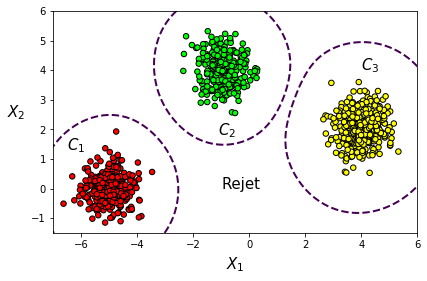

In [4]:
nom_figure = "Figure_20(1)_20.svg"

pdf.affiche_clusters(affiche_tickmarks=True, affiche_contours=True, affiche_prob=False, nom_figure=nom_figure)

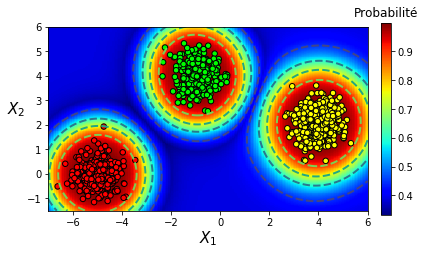

In [5]:
nom_figure = "Figure_20(2)_20.svg"

pdf.affiche_clusters(affiche_tickmarks=True, affiche_contours=False, affiche_prob=True, nom_figure=nom_figure)